# Module - 5

XGBoost Classifier

In [1]:
#import library packages
import pandas as p

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv("Data.csv")

In [4]:
df = data.dropna()

In [5]:
df

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,112Ns49UobQn1cX1G1axs1cmGvjFBxVxvf,2016,146,144,0.877485,4817,0,1,1.040200e+08,montrealCryptXXX
1,1,112wED5uHhY1aiSaWAzgeMDaCKFcCvj9Pn,2016,158,56,0.000031,1,0,1,1.200000e+08,montrealCryptXXX
2,2,112wED5uHhY1aiSaWAzgeMDaCKFcCvj9Pn,2016,156,8,0.750000,2,0,4,2.400000e+08,montrealCryptXXX
3,3,113ESVqntvYprqQbsPN6tEmtE1bB44uokS,2016,155,6,0.500000,6,0,2,1.200000e+08,montrealCryptXXX
4,4,114gGmini5G9hEwEkWtKXoQqT1D6S5AJvU,2016,137,0,1.000000,1,0,2,1.199900e+08,montrealCryptXXX
...,...,...,...,...,...,...,...,...,...,...,...
14509,14509,1MgznHE8cHx7rHhywkkGNzjTSKefrZ2Jtk,2013,159,4,3.500000,9,0,4,2.514687e+09,white
14510,14510,19HvxWiz8RFQ9hrR4t5TQRiKrpDB9mC2Pr,2014,3,0,0.500000,1,0,2,5.218000e+07,white
14511,14511,1HwF24L61LLg81jLvq7KCnkFudYHNXNx83,2011,309,8,0.031250,1,0,2,2.493100e+09,white
14512,14512,12qgrq2xgE7VukMcAHh3Nwksf9a43AoCaa,2014,169,12,0.093750,2,0,2,4.943000e+07,white


In [6]:
del df['Unnamed: 0']
del df['address']

In [7]:
df['label']=df['label'].map({'montrealCryptXXX':'Crypto','montrealCryptoLocker':'CryptoLocker','paduaCryptoWall':'CryptoWall','princetonCerber':'Cerber','princetonLocky':'Locky','white':'White'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14514 entries, 0 to 14513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14514 non-null  int64  
 1   day        14514 non-null  int64  
 2   length     14514 non-null  int64  
 3   weight     14514 non-null  float64
 4   count      14514 non-null  int64  
 5   looped     14514 non-null  int64  
 6   neighbors  14514 non-null  int64  
 7   income     14514 non-null  float64
 8   label      14514 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.1+ MB


In [9]:
df['label'].unique()

array(['Crypto', 'CryptoLocker', 'CryptoWall', 'Cerber', 'Locky', 'White'],
      dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
col = ['label']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i]).astype(int)

In [11]:
df['label'].unique()

array([1, 2, 3, 0, 4, 5])

In [12]:
df

,year,day,length,weight,count,looped,neighbors,income,label
0,2016,146,144,0.877485,4817,0,1,1.040200e+08,1
1,2016,158,56,0.000031,1,0,1,1.200000e+08,1
2,2016,156,8,0.750000,2,0,4,2.400000e+08,1
3,2016,155,6,0.500000,6,0,2,1.200000e+08,1
4,2016,137,0,1.000000,1,0,2,1.199900e+08,1
...,...,...,...,...,...,...,...,...,...
14509,2013,159,4,3.500000,9,0,4,2.514687e+09,5
14510,2014,3,0,0.500000,1,0,2,5.218000e+07,5
14511,2011,309,8,0.031250,1,0,2,2.493100e+09,5
14512,2014,169,12,0.093750,2,0,2,4.943000e+07,5


In [13]:
X = df.drop(labels='label', axis=1)
y = df.loc[:,'label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of Training Dataset: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Dataset: ", len(X_train)+len(X_test))

Number of Training Dataset:  10159
Number of Testing Dataset:  4355
Total Number of Dataset:  14514


XGBoost Classifier

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, hamming_loss, plot_confusion_matrix

Training Process

In [16]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predicted_xg = xg.predict(X_test)

Getting Accuracy

In [17]:
accuracy = accuracy_score(y_test,predicted_xg)
print('Accuracy of XGBoost Classifier is: ',accuracy*100)

Accuracy of XGBoost Classifier is:  91.34328358208955


Finding Loss

In [18]:
loss = hamming_loss(y_test,predicted_xg)
print('Loss of XGBoost Classifier is: ',loss*100)

Loss of XGBoost Classifier is:  8.656716417910449


Finding Clasiification Report

In [19]:
cr = classification_report(y_test,predicted_xg)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       726
           1       0.97      0.97      0.97       726
           2       0.86      0.92      0.89       725
           3       0.91      0.98      0.94       726
           4       0.97      0.97      0.97       726
           5       0.85      0.69      0.76       726

    accuracy                           0.91      4355
   macro avg       0.91      0.91      0.91      4355
weighted avg       0.91      0.91      0.91      4355



Finding Confusion Matrix

In [20]:
cm = confusion_matrix(y_test,predicted_xg)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[690  12   0   0   8  16]
 [ 17 707   0   0   0   2]
 [  0   0 664  12   0  49]
 [  0   0   0 710   0  16]
 [ 14   0   0   0 706   6]
 [ 43   8 107  56  11 501]]


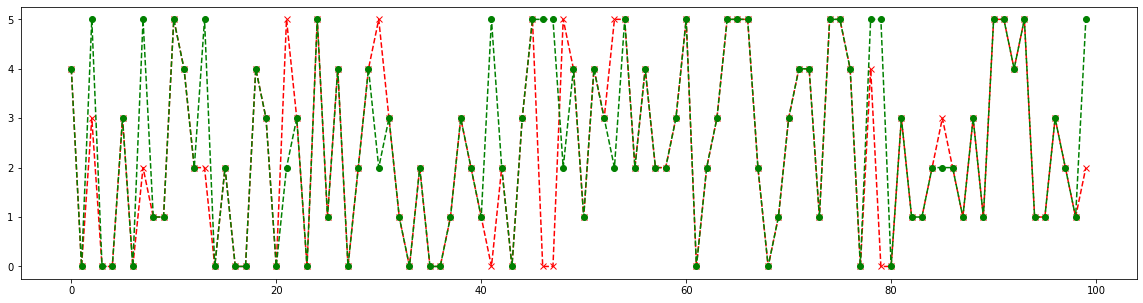

In [21]:
import matplotlib.pyplot as plt
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_xg
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()